In [1]:
#!/usr/bin/env python3
# -*-coding: utf-8 -*-
"""
Created on Tue Aug 22 09:40:00 2017

@author: TristanSong
"""

import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Monaco YaHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

cnames = ['community_1', 'community_2', 'price', 'livingRoom', 'sittingRoom', 'area', 'buildYear', 
         'direction', 'floor_1', 'floor_2', 'decoration', 'downPay', 'company']
df = pd.read_csv('./results.csv', sep=',', header=None, encoding='utf-8')
df.drop([13], axis=1, inplace=True)
df.columns = cnames
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38603 entries, 0 to 38602
Data columns (total 13 columns):
community_1    38603 non-null object
community_2    38603 non-null object
price          38603 non-null int64
livingRoom     38603 non-null int64
sittingRoom    38603 non-null int64
area           38603 non-null int64
buildYear      38603 non-null object
direction      38603 non-null object
floor_1        38603 non-null object
floor_2        38603 non-null int64
decoration     38603 non-null object
downPay        38603 non-null float64
company        38603 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 3.8+ MB


In [2]:
# 先看看数据情况\
# community_1为搜索的小区名称, community_2为搜索结果中解析的数据，存在不对应情况
# floor_1为层数(高中低)，floor_2为总层高
print(df[:10])

  community_1    community_2  price  livingRoom  sittingRoom  area buildYear  \
0        宝龙广场             暂无    145           3            2   133      2012   
1        宝龙广场          万水美兰城    145           3            2   133      2012   
2        宝龙广场             暂无    105           3            2    89      2015   
3        宝龙广场         宝龙城市广场     98           2            2    87      2010   
4        宝龙广场             暂无    137           3            2   142      2010   
5        宝龙广场         宝龙城市广场    163           3            2   123      2012   
6        宝龙广场  梧桐香郡花园西区(玫瑰路)    130           3            2   103      2016   
7        宝龙广场             暂无    130           3            2   103      2016   
8        宝龙广场             暂无    144           3            2   144      2010   
9        宝龙广场         宝龙城市广场    170           3            2   123      2011   

  direction floor_1  floor_2 decoration  downPay company  
0        南北       中       32         毛坯     43.5      暂无  
1

In [3]:
# 把小区所属的区域加入
df_community = pd.read_csv('./常州_小区.csv', header=None, sep=',', encoding='utf-8')
df_community.drop([5], axis=1, inplace=True)
cnames = ['community_1', 'lat', 'lng', 'address', 'district']
df_community.columns = cnames
df = pd.merge(df, df_community, on='community_1')
# 先初步清洗掉同一中介发了多次的房源
df.drop_duplicates()
print(df.head(10))

  community_1    community_2  price  livingRoom  sittingRoom  area buildYear  \
0        宝龙广场             暂无    145           3            2   133      2012   
1        宝龙广场          万水美兰城    145           3            2   133      2012   
2        宝龙广场             暂无    105           3            2    89      2015   
3        宝龙广场         宝龙城市广场     98           2            2    87      2010   
4        宝龙广场             暂无    137           3            2   142      2010   
5        宝龙广场         宝龙城市广场    163           3            2   123      2012   
6        宝龙广场  梧桐香郡花园西区(玫瑰路)    130           3            2   103      2016   
7        宝龙广场             暂无    130           3            2   103      2016   
8        宝龙广场             暂无    144           3            2   144      2010   
9        宝龙广场         宝龙城市广场    170           3            2   123      2011   

  direction floor_1  floor_2 decoration  downPay company       lat  \
0        南北       中       32         毛坯     43.5 

In [4]:
# 再看看数据概括
# 数据源中存在别墅，如售价最大2668w，卧室9间，客厅9间，面积1094平方，光首付就要800w
# 存在错误情况：如楼层居然91层，后面会清理
print(df.describe())

              price    livingRoom   sittingRoom          area       floor_2  \
count  37573.000000  37573.000000  37573.000000  37573.000000  37573.000000   
mean     135.271472      2.819817      1.886195    117.039736     18.601735   
std       85.889012      0.941493      0.416681     49.351476     10.426685   
min        6.000000      1.000000      0.000000     10.000000      0.000000   
25%       90.000000      2.000000      2.000000     88.000000      7.000000   
50%      120.000000      3.000000      2.000000    110.000000     18.000000   
75%      160.000000      3.000000      2.000000    136.000000     30.000000   
max     2668.000000      9.000000      9.000000   1094.000000     91.000000   

            downPay           lat           lng  
count  37573.000000  37573.000000  37573.000000  
mean      40.578351     31.793553    119.959363  
std       25.768438      0.050638      0.038715  
min        1.800000     31.379082    119.466727  
25%       27.000000     31.761443    1

In [5]:
# 来看看楼层91的是什么鬼
print(df[df.floor_2>34])
# 存在中介随便填超高的楼层，以及35~44的楼层，真实性暂且不表，清洗掉
df.drop(df.index[df.floor_2>34], axis=0, inplace=True)

      community_1 community_2  price  livingRoom  sittingRoom  area buildYear  \
526          宝龙广场          暂无    140           3            2   135      2012   
691          宝龙广场          暂无    160           3            2   135      2012   
710          宝龙广场          暂无    160           3            2   106      2014   
737          宝龙广场          暂无    160           3            2   135      2012   
740          宝龙广场          暂无    160           3            2   135      2012   
808          宝龙广场          暂无    105           2            2    87        暂无   
891          宝龙广场          暂无    160           3            2   135      2012   
1191         宝龙广场          暂无    160           3            2   135      2012   
1688        世茂香槟湖       世茂香槟湖     84           2            2    89      2017   
1779        世茂香槟湖       世茂香槟湖    236           5            2   185      2011   
3370        绿地世纪城       绿地世纪城     92           3            2   110      2012   
3554         中央花园        中央花

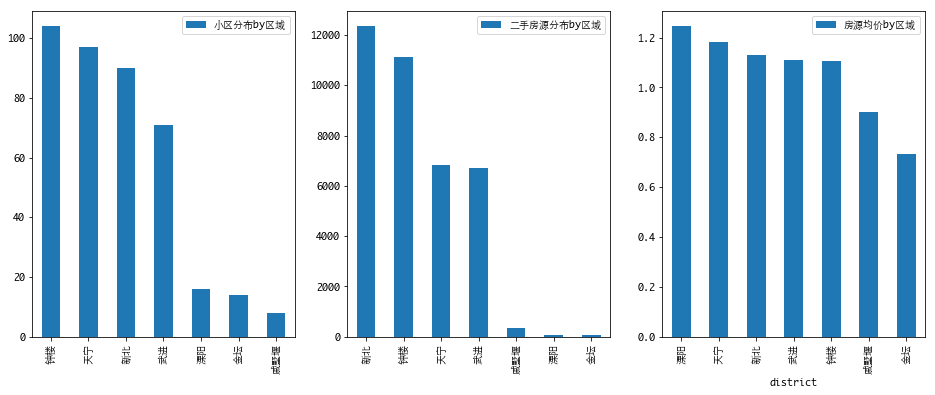

In [6]:
# 先来看看所有房源的地区分布
fig = plt.figure(figsize=(16,6))

# 各区域小区数量分布
# 想不到武进那么大的地方，居然小区数量居然还没有新北、天宁多
# 这个没有特别多有用的信息
ax1 = fig.add_subplot(131)
df_community.district.value_counts().plot(kind='bar')
ax1.legend(['小区分布by区域'], loc='best')

# 各区域小区二手房房源分布
# 新北小区在数量没有钟楼、天宁多的情况下，居然二手房源最多
# 也没有特别多有用的信息
ax2 = fig.add_subplot(132)
df.district.value_counts().plot(kind='bar')
ax2.legend(['二手房源分布by区域'], loc='best')

# 各区域小区房源均价
# 溧阳房价最高应该是由于样本量过小缘故
# 只研究天宁、钟楼、新北、武进，去除溧阳、金坛、戚墅堰
ax3 = fig.add_subplot(133)
df['ave_price'] = df['price']/df['area']
df_price = df[['ave_price', 'district']]
df_price.groupby('district').mean().sort_values(by=['ave_price'], ascending=False).plot(kind='bar', ax=ax3)
ax3.legend(['房源均价by区域'], loc='best')

plt.show()

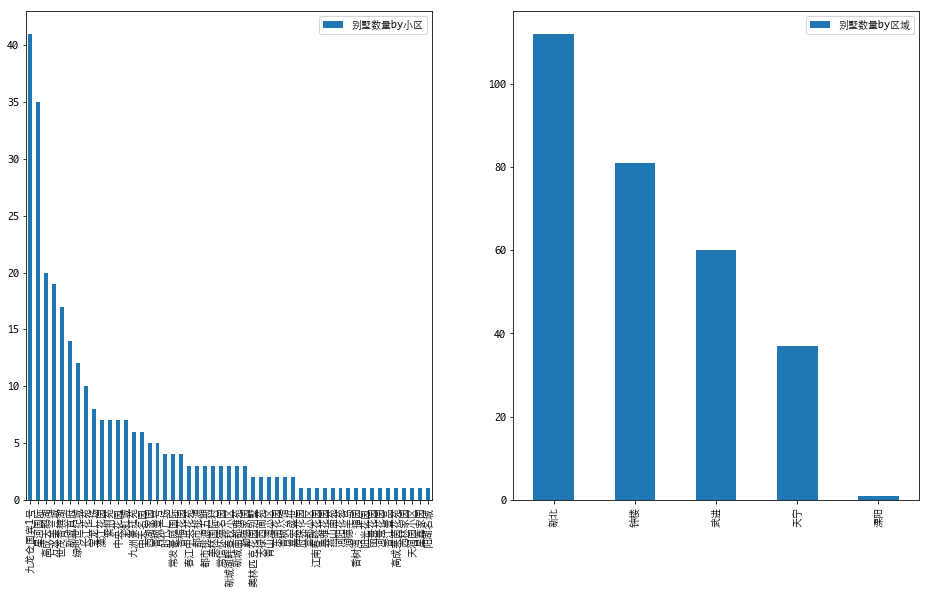

In [7]:
# 再来看看超大户型(300平)
villa = df[df.area>300]
fig = plt.figure(figsize=(16, 9))

# 别墅数量分布
ax1 = fig.add_subplot(121)
villa.community_1.value_counts().plot(kind='bar')
ax1.legend(['别墅数量by小区'], loc='best')

# 别墅按区分布
ax2 = fig.add_subplot(122)
villa.district.value_counts().plot(kind='bar')
ax2.legend([u'别墅数量by区域'], loc='best')

plt.show()

c:\program files\python34\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\program files\python34\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\program files\python34\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\program files\python34\lib\site-packages\ipykernel_launcher.p

上城地产     7366
常居地产     4443
独立经纪人    4408
万科房产     2215
东腾房产     1970
顺驰房产     1952
鑫洋置业     1790
荣创不动产    1314
云天房产      977
满意房产      944
Name: company, dtype: int64


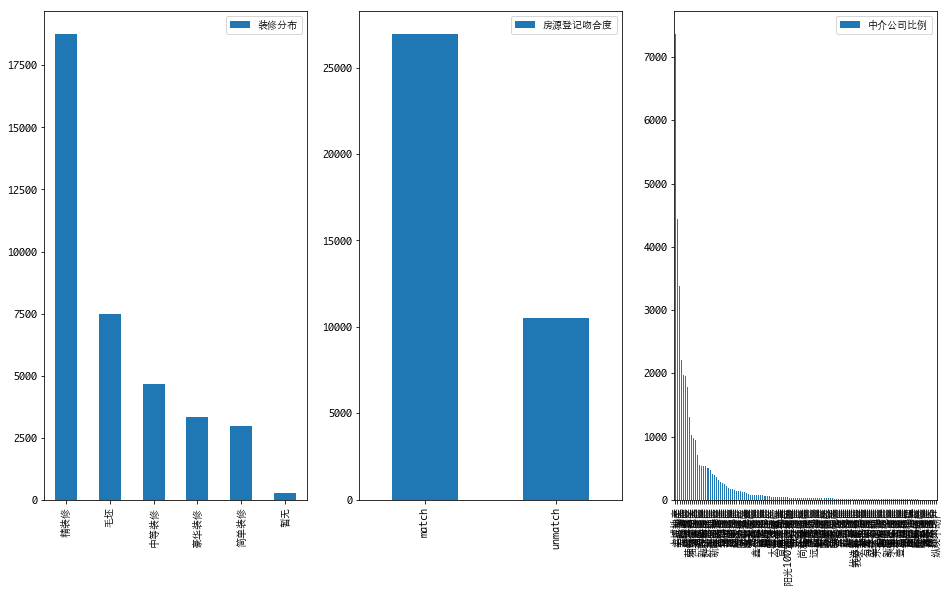

In [8]:
fig = plt.figure(figsize=(16,9))

# 来看看装修水平到底有几档，但是估计'精装修'还是有水分的
ax1 = fig.add_subplot(131)
df.decoration.value_counts().plot(kind='bar', ax=ax1)
ax1.legend(['装修分布'], loc='best')
# 把暂无归类为毛坯
df.decoration[df.decoration=='暂无'] = '毛坯'
df.decoration[df.decoration=='豪华装修'] = '精装修'
df.decoration[df.decoration=='简单装修'] = '中等装修'

# 再来看看中介在发布房源的时候，是否有完全按照格式要求填写信息
# 不符合：符合约1：2.5，可见中介登记房源时，很多时候并不完全按照格式填写信息
ax2 = fig.add_subplot(132)
match_length = len(df[df.community_1 == df.community_2])
match_dict = {'match': match_length, 'unmatch': len(df)-match_length}
com_match = pd.DataFrame.from_dict(match_dict,orient='index')
com_match.plot(kind='bar', ax=ax2)
ax2.legend(['房源登记吻合度'], loc='best')

# 再来看看中介公司比例
ax3 = fig.add_subplot(133)
df.company.value_counts().plot(kind='bar', ax=ax3)
ax3.legend(['中介公司比例'], loc='best')
# 姑且认为‘暂无’为‘独立经纪人’
df.company[df.company=='暂无'] = '独立经纪人'
print(df.company.value_counts().head(10))
# 扣除独立经纪人一栏，上城地产独领风骚，常居地产稳居第二身位，剩下万科房产、东腾地产、顺驰房产、鑫洋置业类似，有点’一超多强‘的意思

plt.show()

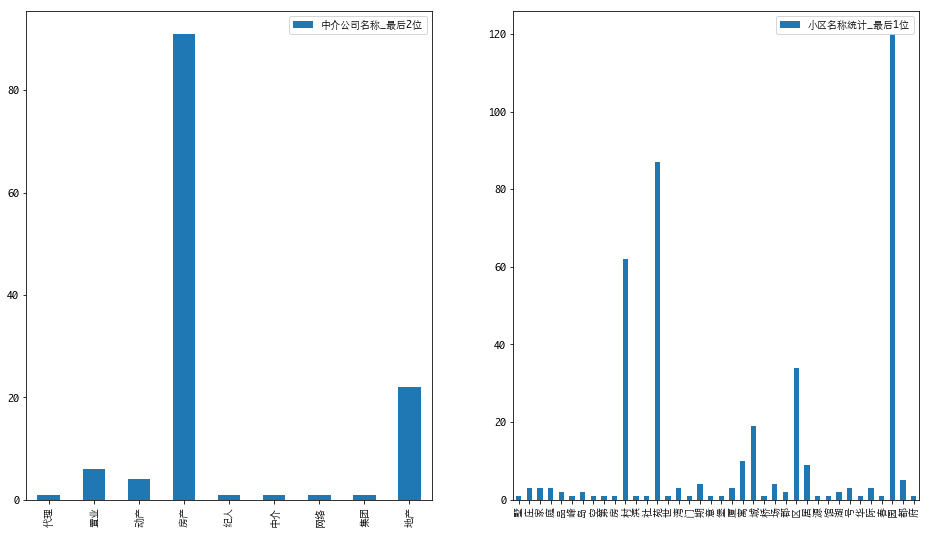

In [9]:
# 顺便我们卡看这些中介、小区的取名，分别去名称最后2位、1位
fig = plt.figure(figsize=(16,9))

# 中介公司以‘房产’结尾一家读秀，‘地产’次之
ax1 = fig.add_subplot(121)
company = df.company.value_counts()
com_dict = {}
for i in company.index:
    com_dict[i[-2:]] = com_dict.setdefault(i[-2:], 0) + 1
df_com = pd.DataFrame.from_dict(com_dict,orient='index')
df_com.plot(kind='bar', ax=ax1)
ax1.legend(['中介公司名称_最后2位'], loc='best')

# 前三甲为‘园’、‘苑’、‘村’，村主要是由于老的城中村，看来小区名称不够百花齐放啊！
ax2 = fig.add_subplot(122)
community = df_community.community_1.value_counts()
community_dict = {}
for i in community.index:
    community_dict[i[-1]] = community_dict.setdefault(i[-1], 0) + 1
pd.DataFrame.from_dict(community_dict, orient='index').plot(kind='bar', ax=ax2)
ax2.legend(['小区名称统计_最后1位'], loc='best')

plt.show()

# 顺便直接看看词云图
# 该库目前仍存在问题，不能同时显示，或者同一canvas分图显示
from pyecharts import WordCloud
cloud_1 = WordCloud()
cloud_1.add('中介公司名称_最后2位', list(com_dict.keys()), list(com_dict.values()))
cloud_1

cloud_2 = WordCloud()
cloud_2.add('小区公司名称_最后1位', list(community_dict.keys()), list(community_dict.values()))
cloud_2

南       20557
南北      14779
东        1038
东南        293
北         187
西南        183
暂无        180
西         112
西北         67
东西         52
东北         21
暂无数据        6
Name: direction, dtype: int64


c:\program files\python34\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\program files\python34\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\program files\python34\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
c:\progr

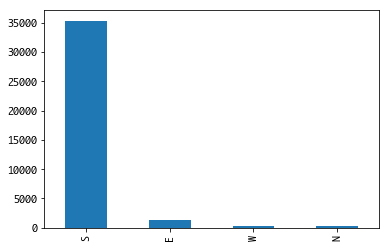

中    13138
高    12704
低     9288
无     2159
Name: floor_1, dtype: int64


c:\program files\python34\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files\python34\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files\python34\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2012    9187
2010    4153
2011    2475
2008    2301
2009    2107
2014    2071
2013    2008
2015    1905
2000    1887
2007    1564
2016    1077
2005    1077
2006    1050
1998     650
2004     566
2017     495
2002     486
2003     423
1999     271
2001     262
1990     199
1995     197
1996     162
1997     118
1993      94
1988      83
1992      63
1989      57
1985      50
1986      40
1994      38
1991      37
1984      31
1981      30
1987      24
暂无        23
1980      13
1900       9
1983       2
1947       1
1982       1
1951       1
1908       1
Name: buildYear, dtype: int64
False    22501
True     14753
dtype: int64


c:\program files\python34\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files\python34\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files\python34\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
# 再来看看同一房源会放到几家中介进行出售
# 我们认为判断重复条件为：小区community_1、房价、几室几厅、面积、楼层、楼高、朝向
# 朝向要更新一下，如南北和南为同一个意思
# 中介公司填写房源信息时对于房屋的建筑时间并不在意，所以存在可能不统一情况，故不作为判断条件

# 先看看朝向
print(df.direction.value_counts())
# 归一清洗
df.direction[df.direction=='南北'] = '南'
df.direction[df.direction=='东西'] = '东'
df.direction[df.direction=='东南'] = '东'
df.direction[df.direction=='西南'] = '西'
df.direction[df.direction=='西北'] = '北'
df.direction[df.direction=='东北'] = '北'
df.drop(df.index[df.direction=='暂无'], axis=0, inplace=True)
df.drop(df.index[df.direction=='暂无数据'], axis=0, inplace=True)

df.direction[df.direction=='南'] = 'S'
df.direction[df.direction=='东'] = 'E'
df.direction[df.direction=='西'] = 'W'
df.direction[df.direction=='北'] = 'N'

fig = plt.figure()
df.direction.value_counts().plot(kind='bar')
plt.show()

# 再看看楼层
print(df.floor_1.value_counts())
# 归一处理：就把无处理成‘低’
df.floor_1[df.floor_1=='无'] = '低'

df.floor_1[df.floor_1=='高'] = 'H'
df.floor_1[df.floor_1=='中'] = 'M'
df.floor_1[df.floor_1=='低'] = 'L'

# 再看看建造时间
print(df.buildYear.value_counts())
# 去除过老房源及暂无情况
df.drop(df.index[df.buildYear=='暂无'], axis=0, inplace=True)
df['buildYear'] = df['buildYear'].astype('int16')
df.drop(df.index[df.buildYear<1980], axis=0, inplace=True)

# 电梯房和非楼梯房存在很大差距，层高<=6层为非电梯房，>6为电梯房
df.floor_2[df.floor_2<=6] = 0
df.floor_2[df.floor_2>6] = 1

IsDuplicated=df.duplicated(['community_1', 'price', 'livingRoom', 'sittingRoom', 'area', 'direction', 'floor_1', 'floor_2'])
print(IsDuplicated.value_counts())
# 重复房源居然有12404个，也就是意味着人均会在37384/24980=1.496家中介发布房源

In [11]:
# 去除溧阳、金坛、戚墅堰的房源
# 去除>300平以上房源
# 去除>1000w房源
# 去除卧室>5房源(估计为爬虫解析错误)
# 去除重复发布的房源：小区community_1、房价、几室几厅、面积、楼层、楼高、朝向
df.drop(df.index[df.district=='溧阳'], axis=0, inplace=True)
df.drop(df.index[df.district=='戚墅堰'], axis=0, inplace=True)
df.drop(df.index[df.district=='金坛'], axis=0, inplace=True)
df.drop(df.index[df.area>300], axis=0, inplace=True)
df.drop(df.index[df.price>1000], axis=0, inplace=True)
df.drop(df.index[df.livingRoom>5], axis=0, inplace=True)
df.drop_duplicates(['community_1', 'price', 'livingRoom', 'sittingRoom', 'area', 'direction', 'floor_1', 'floor_2'], inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21658 entries, 0 to 37572
Data columns (total 18 columns):
community_1    21658 non-null object
community_2    21658 non-null object
price          21658 non-null int64
livingRoom     21658 non-null int64
sittingRoom    21658 non-null int64
area           21658 non-null int64
buildYear      21658 non-null int16
direction      21658 non-null object
floor_1        21658 non-null object
floor_2        21658 non-null int64
decoration     21658 non-null object
downPay        21658 non-null float64
company        21658 non-null object
lat            21658 non-null float64
lng            21658 non-null float64
address        21658 non-null object
district       21658 non-null object
ave_price      21658 non-null float64
dtypes: float64(4), int16(1), int64(5), object(8)
memory usage: 3.0+ MB
None


In [12]:
# 以上我们分析了小区、中介、房源等
# 下面我们添加学区、交通（BRT & METRO）、公园，来进行数据挖掘

# BRT
df_brt = pd.read_csv('./小区_BRT.csv', sep=',', header=None)
cnames = ['community_1', 'd_BRT', 'stat_BRT', 'district']
df_brt.columns = cnames
df_brt.drop(['stat_BRT', 'district'], axis=1, inplace=True)
df = pd.merge(df, df_brt, on='community_1')

# METRO
df_metro = pd.read_csv('./小区_METRO.csv', sep=',', header=None)
cnames = ['community_1', 'd_METRO', 'stat_METRO', 'district']
df_metro.columns = cnames
df_metro.drop(['stat_METRO', 'district'], axis=1, inplace=True)
df = pd.merge(df, df_metro, on='community_1')

# PARK
df_park = pd.read_csv('./小区_PARK.csv', sep=',', header=None)
cnames = ['community_1', 'd_PARK', 'stat_PARK', 'district']
df_park.columns = cnames
df_park.drop(['stat_PARK', 'district'], axis=1, inplace=True)
df = pd.merge(df, df_park, on='community_1')

# 学区
df_school = pd.read_csv('./小区_SCHOOL.csv', sep=',', header=0)
df_school.drop(df_school.columns[[-1]], axis=1, inplace=True)
df_school.drop('行政区', axis=1, inplace=True)
df = pd.merge(df, df_school, left_on='community_1', right_on='小区')
df.drop(['community_2', '小区'], axis=1, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21658 entries, 0 to 21657
Data columns (total 26 columns):
community_1    21658 non-null object
price          21658 non-null int64
livingRoom     21658 non-null int64
sittingRoom    21658 non-null int64
area           21658 non-null int64
buildYear      21658 non-null int16
direction      21658 non-null object
floor_1        21658 non-null object
floor_2        21658 non-null int64
decoration     21658 non-null object
downPay        21658 non-null float64
company        21658 non-null object
lat            21658 non-null float64
lng            21658 non-null float64
address        21658 non-null object
district       21658 non-null object
ave_price      21658 non-null float64
d_BRT          21658 non-null int64
d_METRO        21658 non-null int64
d_PARK         21658 non-null int64
觅渡桥小学          21658 non-null int64
二十四中           21658 non-null int64
局前街小学          21658 non-null int64
实验小学           21658 non-null int64
解放路小学       

In [13]:
# 以上我们有了所有的数据，准备可以数据挖掘
# 先看看总体数据

# 去掉小区、均价、行政区、首付、中介公司、经度、纬度、地址
df.drop(['community_1', 'ave_price', 'district', 'downPay', 'company', 'lat', 'lng', 'address'], axis=1, inplace=True)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21658 entries, 0 to 21657
Data columns (total 18 columns):
price          21658 non-null int64
livingRoom     21658 non-null int64
sittingRoom    21658 non-null int64
area           21658 non-null int64
buildYear      21658 non-null int16
direction      21658 non-null object
floor_1        21658 non-null object
floor_2        21658 non-null int64
decoration     21658 non-null object
d_BRT          21658 non-null int64
d_METRO        21658 non-null int64
d_PARK         21658 non-null int64
觅渡桥小学          21658 non-null int64
二十四中           21658 non-null int64
局前街小学          21658 non-null int64
实验小学           21658 non-null int64
解放路小学          21658 non-null int64
博爱小学           21658 non-null int64
dtypes: int16(1), int64(14), object(3)
memory usage: 3.0+ MB
None
              price    livingRoom   sittingRoom          area     buildYear  \
count  21658.000000  21658.000000  21658.000000  21658.000000  21658.000000   
mean     127.015

In [14]:
# 分别对朝向、楼层、装修特征因子化
direction_dummies = pd.get_dummies(df['direction'], prefix='direction')
floor_dummies = pd.get_dummies(df['floor_1'], prefix='floor')
decoration_dummies = pd.get_dummies(df['decoration'], prefix='decoration')
df = pd.concat([df, direction_dummies, floor_dummies, decoration_dummies], axis=1)
df.drop(['direction', 'decoration', 'floor_1'], axis=1, inplace=True)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21658 entries, 0 to 21657
Data columns (total 25 columns):
price              21658 non-null int64
livingRoom         21658 non-null int64
sittingRoom        21658 non-null int64
area               21658 non-null int64
buildYear          21658 non-null int16
floor_2            21658 non-null int64
d_BRT              21658 non-null int64
d_METRO            21658 non-null int64
d_PARK             21658 non-null int64
觅渡桥小学              21658 non-null int64
二十四中               21658 non-null int64
局前街小学              21658 non-null int64
实验小学               21658 non-null int64
解放路小学              21658 non-null int64
博爱小学               21658 non-null int64
direction_E        21658 non-null uint8
direction_N        21658 non-null uint8
direction_S        21658 non-null uint8
direction_W        21658 non-null uint8
floor_H            21658 non-null uint8
floor_L            21658 non-null uint8
floor_M            21658 non-null uint8
decoration_

In [16]:
# 对面积、建筑时间、BRT距离、METRO距离、公园距离进行标准化
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
area_scale_param = scaler.fit(df['area'].values.reshape(-1,1))
df['area_scaled'] = scaler.fit_transform(df['area'].values.reshape(-1,1), area_scale_param)[:,0]
build_scale_param= scaler.fit(df['buildYear'].values.reshape(-1,1))
df['buildYear_scaled'] = scaler.fit_transform(df['buildYear'].values.reshape(-1,1), build_scale_param)[:,0]
floor2_scale_param = scaler.fit(df['floor_2'].values.reshape(-1,1))
df['floor2_scaled'] = scaler.fit_transform(df['floor_2'].values.reshape(-1,1), floor2_scale_param)[:,0]
brt_scale_param = scaler.fit(df['d_BRT'].values.reshape(-1,1))
df['brt_scaled'] = scaler.fit_transform(df['d_BRT'].values.reshape(-1,1), brt_scale_param)[:,0]
metro_scale_param = scaler.fit(df['d_METRO'].values.reshape(-1,1))
df['metro_scaled'] = scaler.fit_transform(df['d_METRO'].values.reshape(-1,1), metro_scale_param)[:,0]
park_scale_param = scaler.fit(df['d_PARK'].values.reshape(-1,1))
df['park_scaled'] = scaler.fit_transform(df['d_PARK'].values.reshape(-1,1), park_scale_param)[:,0]
df.drop(['area', 'buildYear', 'floor_2', 'd_BRT', 'd_METRO', 'd_PARK'], axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21658 entries, 0 to 21657
Data columns (total 25 columns):
price               21658 non-null int64
livingRoom          21658 non-null int64
sittingRoom         21658 non-null int64
觅渡桥小学               21658 non-null int64
二十四中                21658 non-null int64
局前街小学               21658 non-null int64
实验小学                21658 non-null int64
解放路小学               21658 non-null int64
博爱小学                21658 non-null int64
direction_E         21658 non-null uint8
direction_N         21658 non-null uint8
direction_S         21658 non-null uint8
direction_W         21658 non-null uint8
floor_H             21658 non-null uint8
floor_L             21658 non-null uint8
floor_M             21658 non-null uint8
decoration_中等装修     21658 non-null uint8
decoration_毛坯       21658 non-null uint8
decoration_精装修      21658 non-null uint8
area_scaled         21658 non-null float64
buildYear_scaled    21658 non-null float64
floor2_scaled       21658 

In [24]:
# 划分训练集、测试集
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

df_np = df.as_matrix()
df_data = df_np[:, 1:]
df_target = df_np[:, 0]
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=0)

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [26]:
predictions = clf.predict(X_test)
results = pd.DataFrame({'prediction':predictions, 'real': y_test, 'diff':predictions-y_test, 'diff_per':(predictions-y_test)/y_test})
results.to_csv('./lr_predictions.csv', index=False)